In [122]:
import re
import nltk
import numpy as np
import pandas as pd
#nltk.download('wordnet')
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from emoji_translate.emoji_translate import Translator
import spacy
from textblob import TextBlob
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import seaborn as sns
import matplotlib.pyplot as plt 

In [85]:
# Import datasets
print("Loading data")
df_squidgame = pd.read_csv('../data/df_squidgame_en.csv')
df_netflix = pd.read_csv('../data/df_netflix_en.csv')
df_theguilty = pd.read_csv('../data/df_theguilty_en.csv')
df_midnightmass = pd.read_csv('../data/df_midnightmass_en.csv')
df_maid = pd.read_csv('../data/df_maid_en.csv')

Loading data


In [74]:
print(df_squidgame.shape)
print(df_netflix.shape)
print(df_theguilty.shape)
print(df_midnightmass.shape)
print(df_maid.shape)

(23956, 4)
(3456, 4)
(1444, 4)
(7690, 4)
(3133, 4)


In [63]:
df_squidgame.tweet.loc[5]

'how it started. how it’s going. lamuralla squidgame lamurallaroja squidgamenetflix spain korea'

In [71]:
#REMOVE STOPWORDS
STOPWORDS = nltk.corpus.stopwords.words('english')
#newStopWords = ['SquidGame','Squid Game', 'squid game', 'squidgame']
#STOPWORDS.extend(newStopWords)
STOPWORDS.remove("not", "haven't", "shouldn't")

def remove_stopword(txt):
    #text_tokens = word_tokenize(txt)
    tokens_without_sw = [word for word in txt if not word.lower() in STOPWORDS]
    return tokens_without_sw

In [75]:
#Tranlate emojis to text
def translate_emojis(tweet):
    emo = Translator(exact_match_only=False, randomize=True)
    twt_translated = emo.demojify(tweet)
    return twt_translated

In [101]:
#Clean the redundant content of tweets
def clean_tweet(twt):
    twt_cleaned = twt.lower() 
    twt_cleaned = re.sub(r"\S*https?:\S*", "", twt_cleaned)  
    twt_cleaned = re.sub(r'@[A-Za-z0-9]+', '', twt_cleaned)  # No @mention
    twt_cleaned = re.sub(r'#', '', twt_cleaned)  #remove '#' symbol
    twt_cleaned = re.sub(r'RT[\s]+', '', twt_cleaned)  # #remove RT-retweet
    twt_cleaned = re.sub(r"can\’t", "can not", twt_cleaned)  #extend 'not'
    twt_cleaned = re.sub(r"can\'t", "can not", twt_cleaned)  #extend 'not'
    twt_cleaned = re.sub(r"won\’t", "will not", twt_cleaned)  #extend 'not'
    twt_cleaned = re.sub(r"won\'t", "will not", twt_cleaned)  #extend 'not'
    twt_cleaned = re.sub(r"n\’t", " not", twt_cleaned)  #extend 'not'
    twt_cleaned = re.sub(r"n\'t", " not", twt_cleaned)  #extend 'not'
    twt_cleaned = re.sub(r"\’s", " is", twt_cleaned)  #extend 'not'
    twt_cleaned = re.sub(r"\'s", " is", twt_cleaned)  #extend 'not'
    twt_cleaned = re.sub(r"\s+", " ", twt_cleaned)  #delete spaces
    twt_cleaned = re.sub('[0-9]+', '', twt_cleaned)  # No numbers
    #twt_cleaned = "".join([i for i in twt_cleaned if i not in string.punctuation])  # No punctuations
    return twt_cleaned.strip()

In [102]:
df_squidgame['tweet2'] = df_squidgame.tweet.apply(lambda x: clean_tweet(x))

In [93]:
df_squidgame.tweet

0        Quick squid game fan art of 067  This girl cou...
1        #SquidGame is officially the most watched show...
2        So we received an email from 7's school today ...
3        Moral of the story: middle class hee ache hai ...
4        Can't watch squidgame.. I know there voices ai...
                               ...                        
23951    #SquidGame is such a brilliant series with a p...
23952    #squidgame  The VIPs are Americans so it's not...
23953    New #SquidGame game:  There’s a timer for 15 m...
23954    Unpopular opinion:  #SquidGame is overrated. S...
23955    GOT THAT ASS! #SquidGame  https://t.co/8YXjqtUKiZ
Name: tweet, Length: 23956, dtype: object

In [103]:
df_squidgame['tweet2']

0        quick squid game fan art of  this girl could n...
1        squidgame is officially the most watched show ...
2        so we received an email from  is school today ...
3        moral of the story: middle class hee ache hai ...
4        can not watch squidgame.. i know there voices ...
                               ...                        
23951    squidgame is such a brilliant series with a po...
23952    squidgame the vips are americans so it is not ...
23953    new squidgame game: there is a timer for  minu...
23954    unpopular opinion: squidgame is overrated. so ...
23955                              got that ass! squidgame
Name: tweet2, Length: 23956, dtype: object

### Apply preprocessed functions to all datasets

In [104]:
# Translate emoji icons
df_squidgame['tweet'] = df_squidgame['tweet'].apply(translate_emojis)
df_netflix['tweet'] = df_netflix['tweet'].apply(translate_emojis)
df_theguilty['tweet'] = df_theguilty['tweet'].apply(translate_emojis)
df_midnightmass['tweet'] = df_midnightmass['tweet'].apply(translate_emojis)
df_maid['tweet'] = df_maid['tweet'].apply(translate_emojis)

In [105]:
#Cleaning tweets
df_squidgame['tweet'] = df_squidgame.tweet.apply(lambda x: clean_tweet(x))
df_netflix['tweet'] = df_netflix.tweet.apply(lambda x: clean_tweet(x))
df_theguilty['tweet'] = df_theguilty.tweet.apply(lambda x: clean_tweet(x))
df_midnightmass['tweet'] = df_midnightmass.tweet.apply(lambda x: clean_tweet(x))
df_maid['tweet'] = df_maid.tweet.apply(lambda x: clean_tweet(x))


### Labeling datasets

In [ ]:
##Apply the Pretrained models: TextBlob, Vader

In [109]:
# Fetching the sentiments using Textblob
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [110]:
df_squidgame['sentiment2cat'] = df_squidgame.tweet.apply(fetch_sentiment_using_textblob)
df_netflix['sentiment2cat'] = df_netflix.tweet.apply(fetch_sentiment_using_textblob)
df_theguilty['sentiment2cat'] = df_theguilty.tweet.apply(fetch_sentiment_using_textblob)
df_midnightmass['sentiment2cat'] = df_midnightmass.tweet.apply(fetch_sentiment_using_textblob)
df_maid['sentiment2cat'] = df_maid.tweet.apply(fetch_sentiment_using_textblob)

In [114]:
df_netflix.head()

,tweet,username,likes_count,date,sentiment2cat
0,aged pretty well. comments youtube yt lgbt bla...,creativegene1,0,2021-10-13,pos
1,is it just me or is it weird af when an adult ...,vibewithlo,0,2021-10-13,neg
2,have you seen “amend: the fight for america” o...,lawrencehnyc,0,2021-10-13,pos
3,squid game is officially netflix is 'biggest e...,pulseghana,3,2021-10-13,neg
4,cowboybebop anime set to release on netflix in...,cloutnewsmedia,0,2021-10-13,pos


In [116]:
df_netflix.tweet[4]

'cowboybebop anime set to release on netflix in october  breakingnews netflix netflixnews share cloutnews'

In [117]:
# Fetching the sentiments using Vader
import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [118]:
def sentiment_analyzer_scores(text):
    score = analyser.polarity_scores(text)
    lb = score['compound']
    if lb >= 0.04:
        return 'pos'
    elif (lb > -0.04) and (lb < 0.04):
        return 'neu'
    else:
        return 'neg'

In [119]:
df_squidgame['sentiment3cat'] = df_squidgame.tweet.apply(sentiment_analyzer_scores)
df_netflix['sentiment3cat'] = df_netflix.tweet.apply(sentiment_analyzer_scores)
df_theguilty['sentiment3cat'] = df_theguilty.tweet.apply(sentiment_analyzer_scores)
df_midnightmass['sentiment3cat'] = df_midnightmass.tweet.apply(sentiment_analyzer_scores)
df_maid['sentiment3cat'] = df_maid.tweet.apply(sentiment_analyzer_scores)

### Export data after preprocessing 

In [127]:

df_squidgame.to_csv('../data/df_squidgame_labeled.csv', index = False)
df_netflix.to_csv('../data/df_netflix_labeled.csv', index = False)
df_theguilty.to_csv('../data/df_theguilty_labeled.csv', index = False)
df_midnightmass.to_csv('../data/df_midnightmass_labeled.csv', index = False)
df_maid.to_csv('../data/df_maid_labeled.csv', index = False)

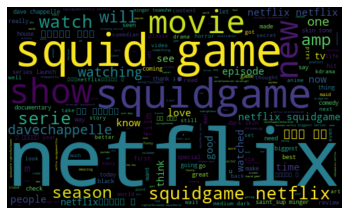

In [123]:
#Plot the wordcloud of Netflix
from wordcloud import WordCloud, STOPWORDS

allwords = ' '.join([twt for twt in df_netflix['tweet']])
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allwords)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

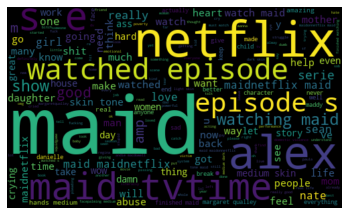

In [126]:
#Plot the wordcloud of Netflix
from wordcloud import WordCloud, STOPWORDS

allwords = ' '.join([twt for twt in df_maid['tweet']])
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allwords)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()